# *EXPLORATORY DATA ANALYSIS*

**Author: Lucía Prieto Santamaría **(lucia.prieto.santamaria@alumnos.upm.es)

This notebook includes the previous to clustering data analysis made on the DISNET database table "similiarity".

In [1]:
# Import of needed libraries
import conexion_edsssdb # This is a module already scripted that makes connection automatized
import pandas as pd # Helps to get and work with the data
import matplotlib # Plot visualization

# Making visible in the notebook plots from matlibplot
%matplotlib inline

In [2]:
# Connection object creation with connection variables. EDSSSDB is the database to connect to.
cnx = conexion_edsssdb.conectar('user', 'password', 'host', 'port', 'db')

Conectado a edsssdb


In [3]:
#Query to database, we can modificate it to get the specifical similarities we need
query = "SELECT " \
        "S_gen_cos AS GeneCosine_Similarity, "  \
        "S_gen_jaccard AS GeneJaccard_Similarity, " \
        "S_gen_dice AS GeneDice_Similarity " \
        "FROM "  \
        "edsssdb.similarity;"

#-----------------------------
######  COMPLETE QUERY  ##### 
#-----------------------------
#        "SELECT " \
#        "S_gen_cos AS GeneCosine_Similarity, "  \
#        "S_gen_jaccard AS GeneJaccard_Similarity, " \
#        "S_gen_dice AS GeneDice_Similarity, " \
#        "S_prot_cos AS ProteinCosine_Similarity, " \
#        "S_prot_jaccard AS ProteinJaccard_Similarity, " \
#        "S_prot_dice AS ProteinDice_Similarity, " \
#        "S_path_cos AS PathwayCosine_Similarity, " \
#        "S_path_jaccard AS PathwayJaccard_Similarity, " \
#        "S_path_dice AS PathwayDice_Similarity, " \
#        "S_ppi_cos AS PPICosine_Similarity, " \
#        "S_ppi_jaccard AS PPIJaccard_Similarity, " \
#        "S_ppi_dice AS PPIDice_Similarity, " \
#        "S_term_cos AS SymptomCosine_Similarity, " \
#        "S_term_jaccard AS SymptomJaccard_Similarity, " \
#        "S_term_dice AS SymptomDice_Similarity " \
#        "FROM "  \
#        "edsssdb.similarity;"

# Pandas dataframe creation from similarities in the database
df = pd.read_sql(query, con=cnx)

In [4]:
# Getting the statistics of the similarities
print(df.describe())

       GeneCosine_Similarity  GeneJaccard_Similarity  GeneDice_Similarity
count           6.736285e+06            6.736285e+06         6.736285e+06
mean            7.836212e-03            2.927301e-03         5.491142e-03
std             3.048507e-02            1.456800e-02         2.430165e-02
min             0.000000e+00            0.000000e+00         0.000000e+00
25%             0.000000e+00            0.000000e+00         0.000000e+00
50%             0.000000e+00            0.000000e+00         0.000000e+00
75%             0.000000e+00            0.000000e+00         0.000000e+00
max             1.000000e+00            1.000000e+00         1.000000e+00


In [5]:
# Settling matplotlib parameters to display an understandable visualization
params = {'axes.titlesize':'25',
          'legend.fontsize':'20',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20'}
matplotlib.rcParams.update(params)

Text(0,0.5,'Frequency (number of disease pairs that have the same similarity coefficient)')

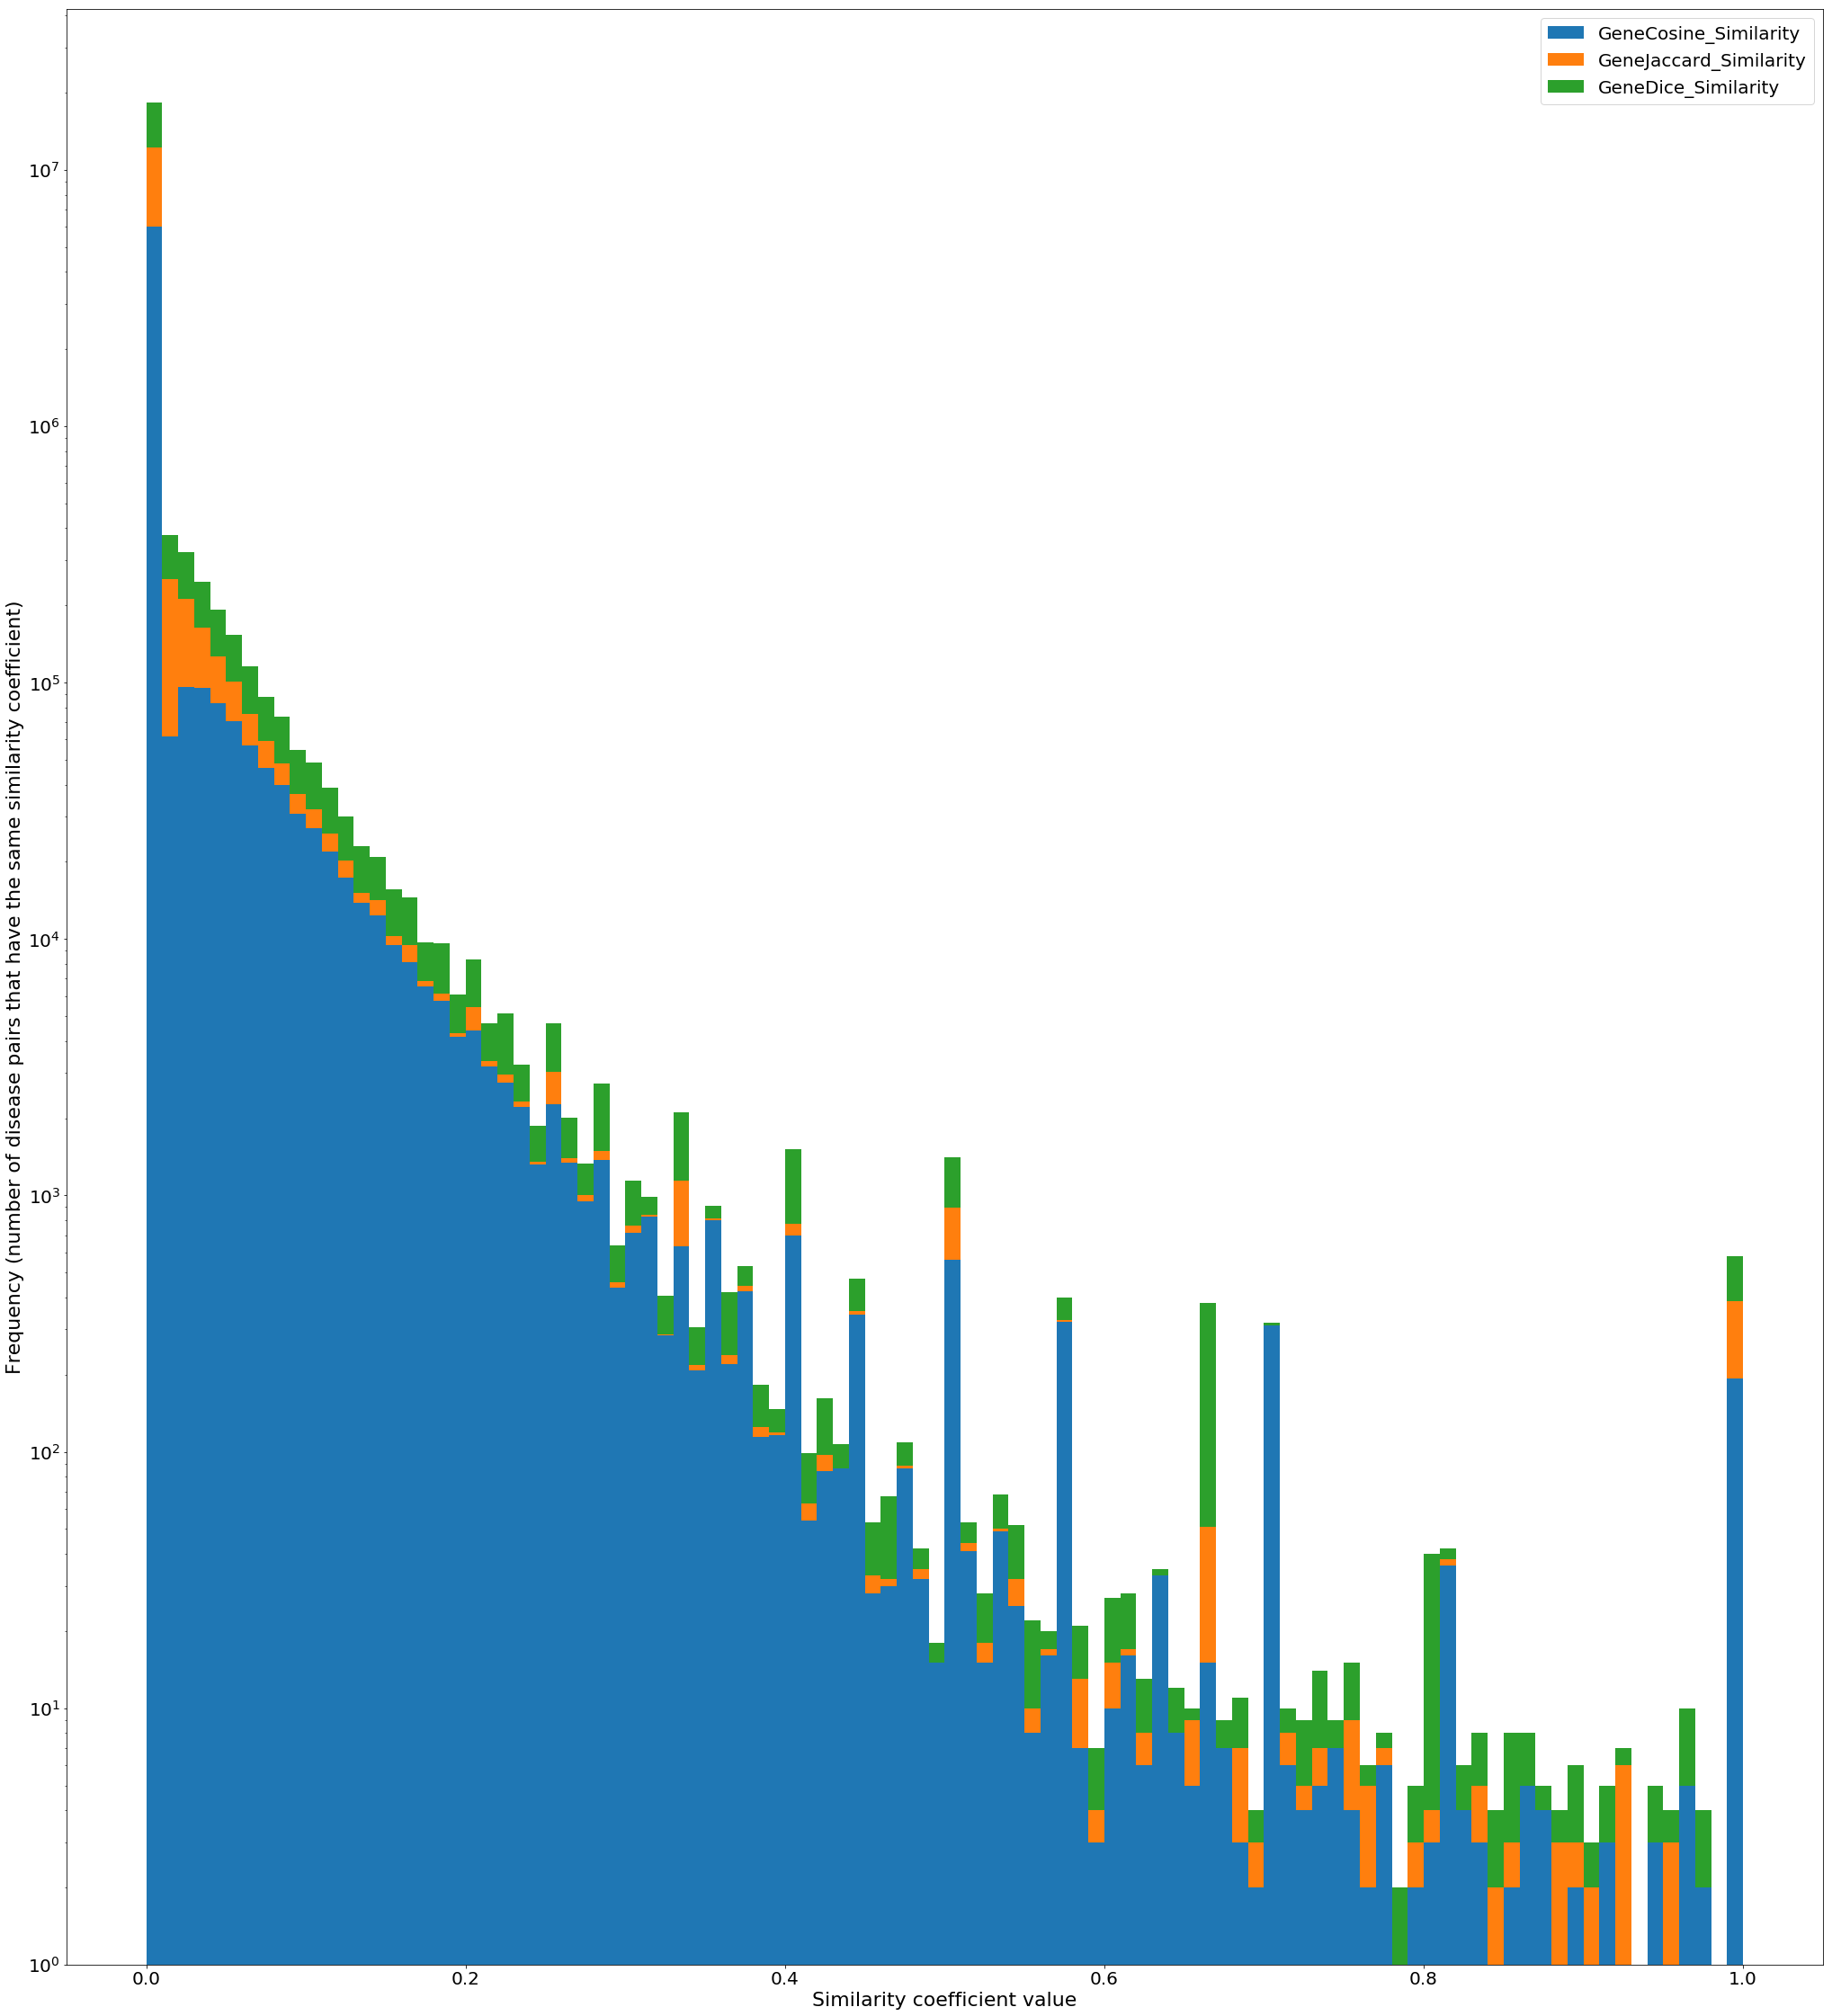

In [6]:
# Displaying histogram
ax = df.plot(kind='hist', stacked=True, log=True, figsize =(35, 40), bins=100)
ax.set_xlabel("Similarity coefficient value", fontsize = 22)
ax.set_ylabel("Frequency (number of disease pairs that have the same similarity coefficient)", fontsize = 22)

Text(0,0.5,'')

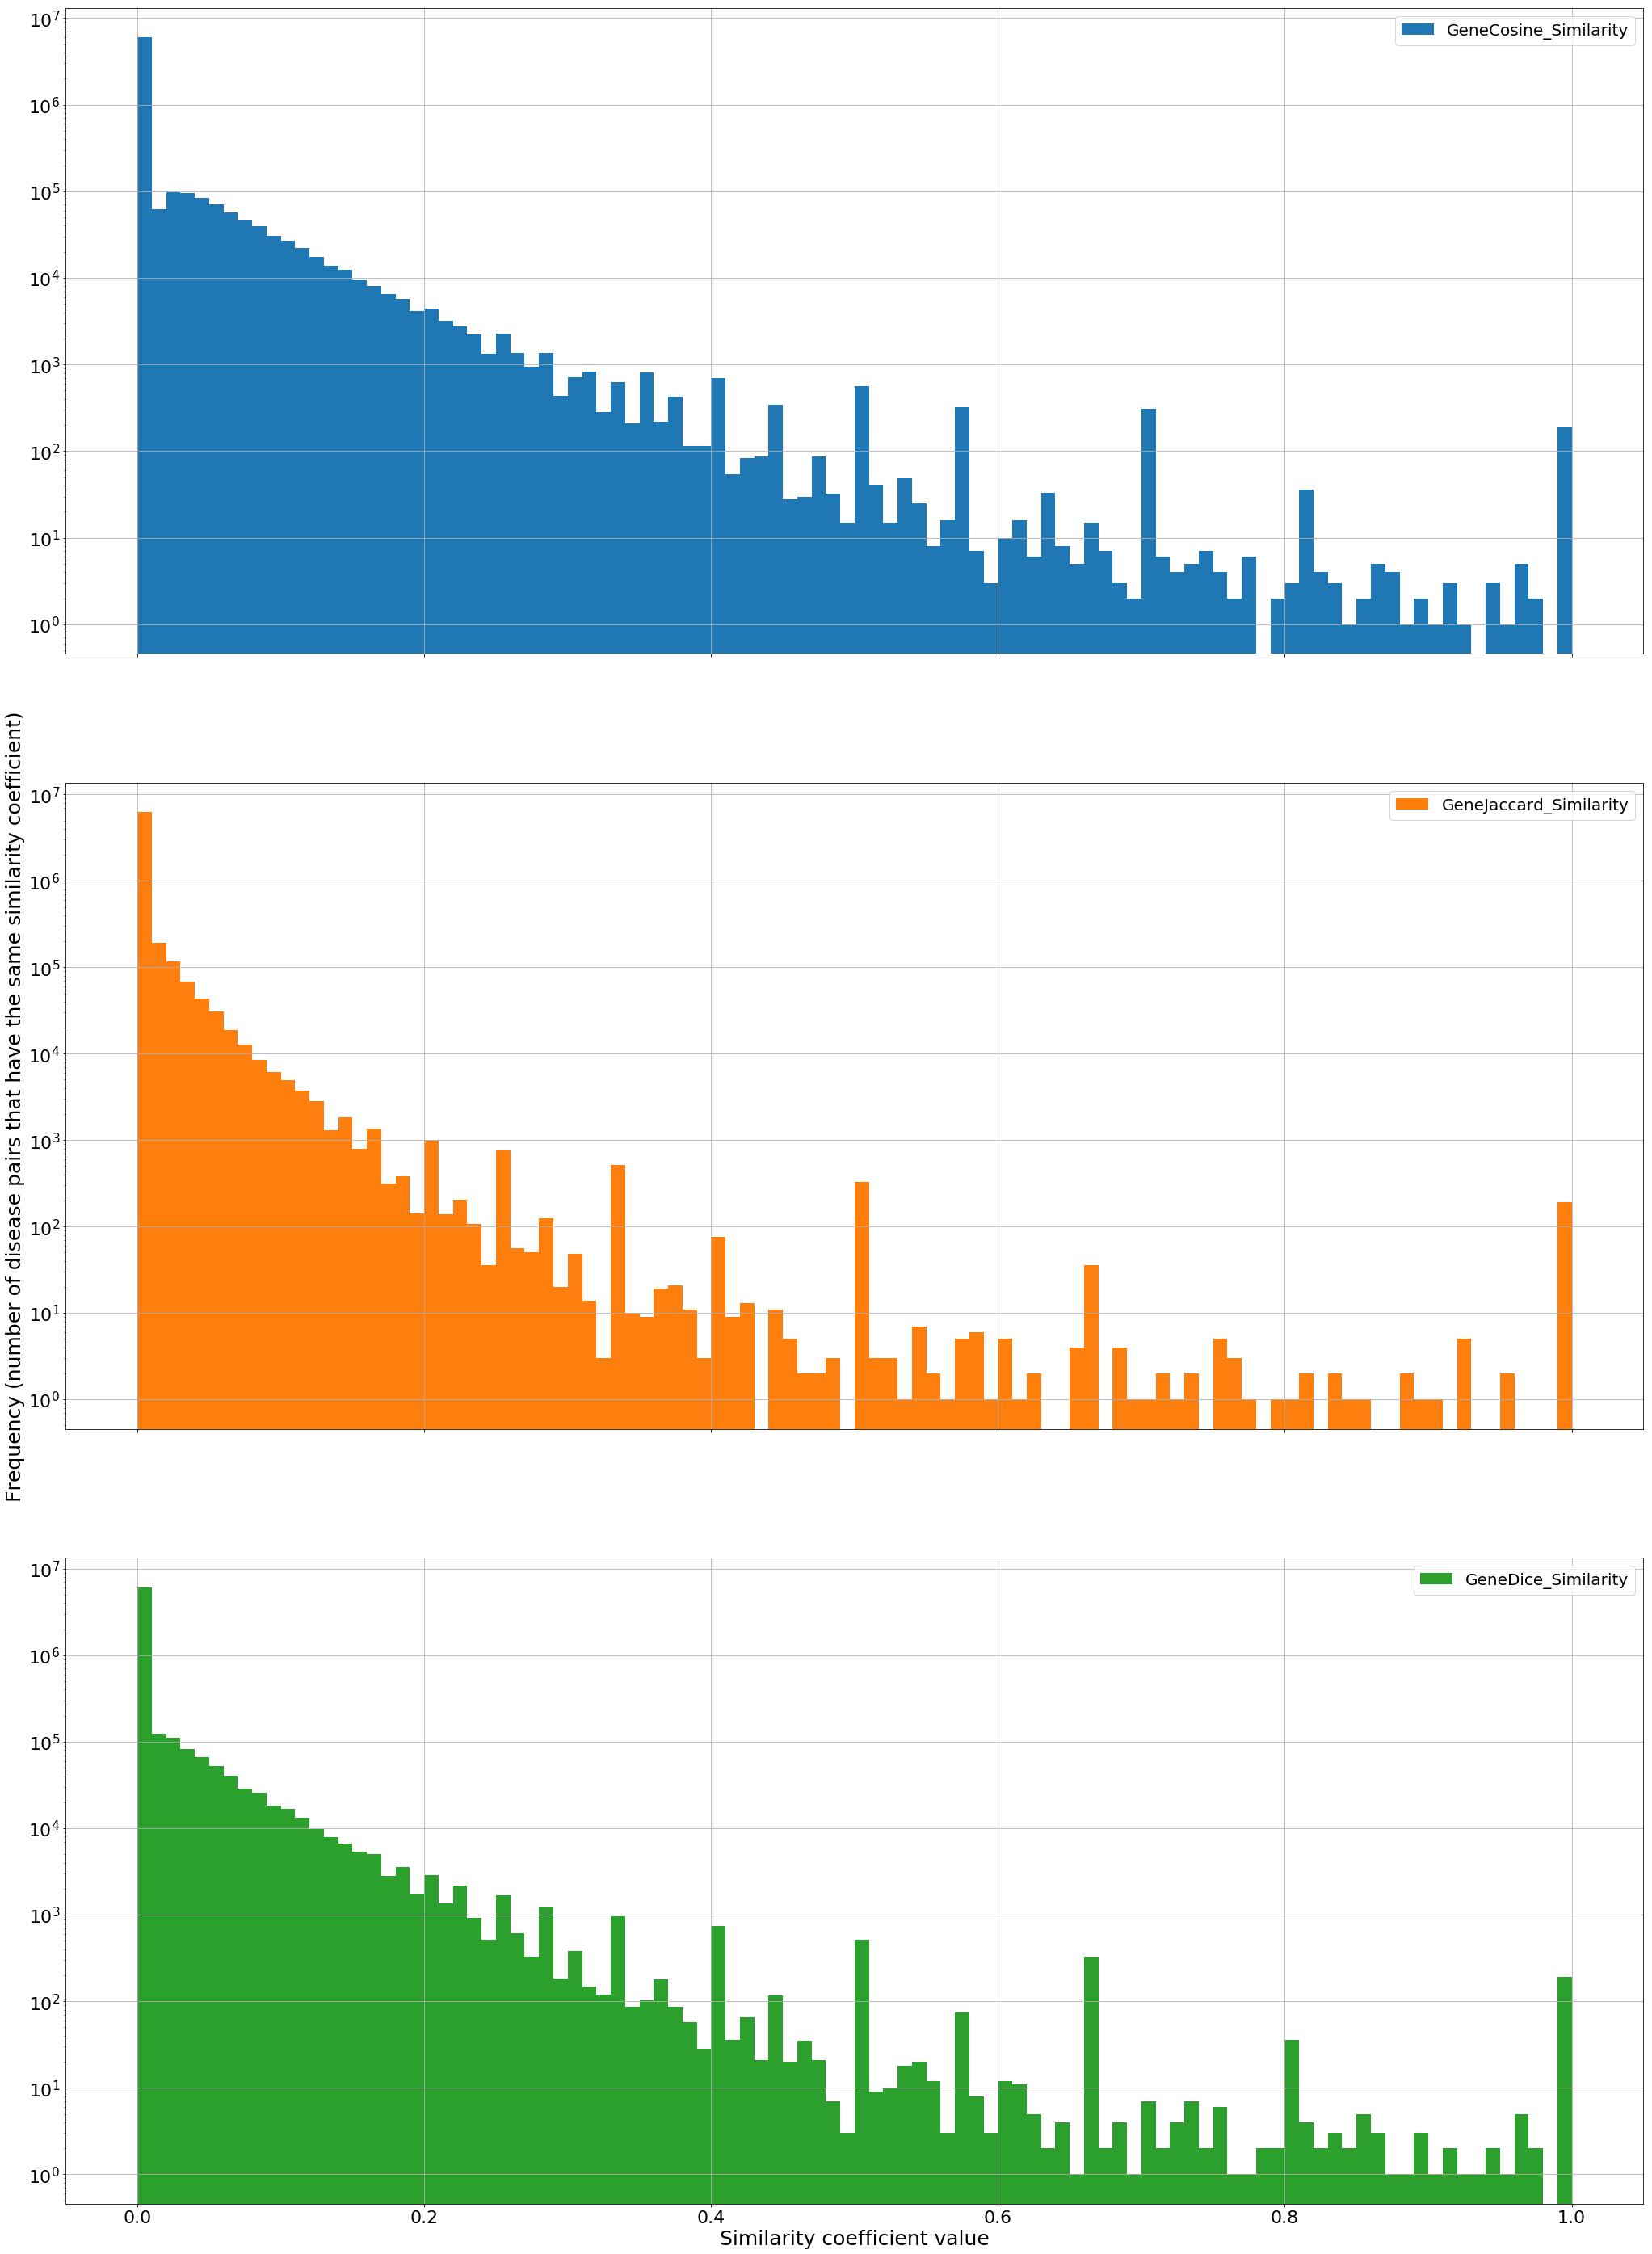

In [7]:
# Clarifying with histograms subplots
ax = df.plot(kind='hist', histtype = 'bar', fontsize = 22, figsize = (35, 50), bins = 100, subplots= True, grid = True, logy=True, sort_columns=True)
ax[2].set_xlabel("Similarity coefficient value", fontsize = 25)
ax[1].set_ylabel("Frequency (number of disease pairs that have the same similarity coefficient)", fontsize = 25)

ax[0].set_ylabel("")
ax[2].set_ylabel("")

In [8]:
# Closing the connection to the database when finished
cnx.close()